In [3]:
from __future__ import print_function

import os.path
import quopri
from io import BytesIO
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from apiclient import errors
import email
import base64
from IPython.display import display, HTML
from escpos.printer import Usb
import usb.core
import imgkit
from PIL import Image
import time


p = Usb(0x04b8, 0x0202)

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/gmail.readonly', 'https://www.googleapis.com/auth/gmail.modify']

def unstar_message(service, msg_id):
    user_id = 'me'

    service.users().messages().modify(userId= user_id, id=msg_id, body= {'removeLabelIds': ["STARRED"]}).execute()

    try:
        service.users().messages().modify(userId= user_id, id=msg_id, body= {'removeLabelIds': ["STARRED"]}).execute()
        print("Pass")
    except:
        print("Error")

def get_message(service, msg_id):
    """
    Search the inbox for specific message by ID and return it back as a 
    clean string. String may contain Python escape characters for newline
    and return line. 
    
    PARAMS
        service: the google api service object already instantiated
        user_id: user id for google api service ('me' works here if
        already authenticated)
        msg_id: the unique id of the email you need
    RETURNS
        A string of encoded text containing the message body
    """

    user_id = 'me'
    service = get_service()

    try:
        # grab the message instance
        message = service.users().messages().get(userId=user_id, id=msg_id,format='raw').execute()

        # decode the raw string, ASCII works pretty well here
        msg_str = base64.urlsafe_b64decode(message['raw'].encode('ASCII'))

        # grab the string from the byte object
        mime_msg = email.message_from_bytes(msg_str)

        # check if the content is multipart (it usually is)
        content_type = mime_msg.get_content_maintype()
        if content_type == 'multipart':
            # there will usually be 2 parts the first will be the body in text
            # the second will be the text in html
            parts = mime_msg.get_payload()

            # return the encoded text
            final_content = parts[1].get_payload()
            return final_content

        elif content_type == 'text':
            return mime_msg.get_payload()

        else:
            return ""
            print("\nMessage is not text or multipart, returned an empty string")
    # unsure why the usual exception doesn't work in this case, but 
    # having a standard Exception seems to do the trick
    except Exception:
        print("An error occured: ")



def search_message(service):
    """
    Search the inbox for emails using standard gmail search parameters
    and return a list of email IDs for each result
    PARAMS:
        service: the google api service object already instantiated
        user_id: user id for google api service ('me' works here if
        already authenticated)
        search_string: search operators you can use with Gmail
        (see https://support.google.com/mail/answer/7190?hl=en for a list)
    RETURNS:
        List containing email IDs of search query
    """
    user_id = 'me'
    search_string = 'Venmo'

    try:
        # initiate the list for returning
        list_ids = []

        # get the id of all messages that are in the search string
        search_ids = service.users().messages().list(userId=user_id, q='is:starred').execute()
        
        # if there were no results, print warning and return empty string
        try:
            ids = search_ids['messages']

        except KeyError:
            print("WARNING: the search queried returned 0 results")
            print("returning an empty string")
            return ""

        if len(ids)>-1:
            for msg_id in ids:
                list_ids.append(msg_id['id'])
            return(list_ids)

        else:
            list_ids.append(ids['id'])
            return list_ids
        
    except (errors.HttpError):
        print("An error occured: ")


def get_service():
    """Shows basic usage of the Gmail API.
    Lists the user's Gmail labels.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    service = build('gmail', 'v1', credentials=creds)

    return service




def print_receipts(service):
    messages = search_message(service)
    print(messages)

    for i in messages:

        message = get_message(service, i)
        chart = HTML(message)

        message = bytes(message, 'ascii')

        OutputFile = BytesIO()
        InputFile = BytesIO(message)
        quopri.decode(InputFile, OutputFile)
        output = OutputFile.getvalue()



        Func = open("GFG-1.html","w", encoding="utf-8")
        Func.write(output.decode('utf-8'))
        Func.close()
        imgkit.from_file("GFG-1.html", 'out.jpg')
        image = Image.open("out.jpg")
        w, h = image.size
        image = image.crop((0, 0, w, h))
        image = image.resize((w + 350, h + 450))
        image.save("out.jpg")
        display(image)
        p.image("out.jpg")
        p.cut()
        print("File Printed")
        unstar_message(service, i)
              

p.cut()


Could not detatch kernel driver: [Errno 13] Access denied (insufficient permissions)


In [4]:
service = get_service()

while True == True:
    print_receipts(service)
    time.sleep(3)
    

RefreshError: ('invalid_grant: Bad Request', {'error': 'invalid_grant', 'error_description': 'Bad Request'})

['188a0d9a00db7013']
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


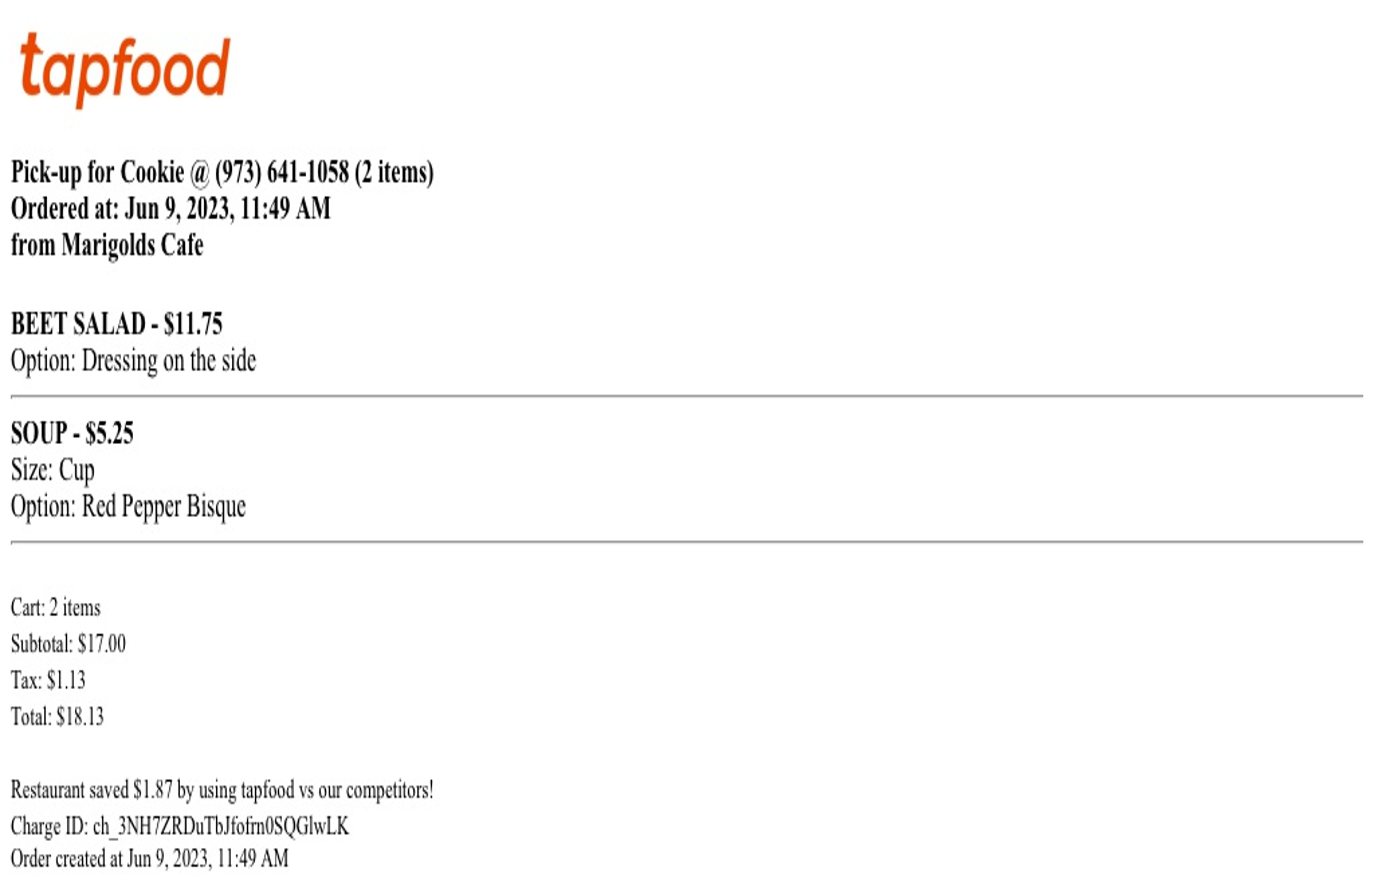

File Printed
Pass
returning an empty string

returning an empty string

returning an empty string



KeyboardInterrupt: 

In [8]:
from __future__ import print_function

import os.path
import quopri
from io import BytesIO
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from apiclient import errors
import email
import base64
from IPython.display import display, HTML
from escpos.printer import Usb
import escpos.image as img
import usb.core
import imgkit
from PIL import Image
import time

p = Usb(0x04b8, 0x0202)

# If modifying these scopes, delete the file token.json.
SCOPES = ['https://www.googleapis.com/auth/gmail.readonly', 'https://www.googleapis.com/auth/gmail.modify']



def unstar_message(service, msg_id):
    user_id = 'me'

    service.users().messages().modify(userId= user_id, id=msg_id, body= {'removeLabelIds': ["STARRED"]}).execute()

    try:
        service.users().messages().modify(userId= user_id, id=msg_id, body= {'removeLabelIds': ["STARRED"]}).execute()
        print("Pass")
    except:
        print("Error")

def get_message(service, msg_id):
    """
    Search the inbox for specific message by ID and return it back as a 
    clean string. String may contain Python escape characters for newline
    and return line. 
    
    PARAMS
        service: the google api service object already instantiated
        user_id: user id for google api service ('me' works here if
        already authenticated)
        msg_id: the unique id of the email you need
    RETURNS
        A string of encoded text containing the message body
    """

    user_id = 'me'
    service = get_service()

    try:
        # grab the message instance
        message = service.users().messages().get(userId=user_id, id=msg_id,format='raw').execute()

        # decode the raw string, ASCII works pretty well here
        msg_str = base64.urlsafe_b64decode(message['raw'].encode('ASCII'))

        # grab the string from the byte object
        mime_msg = email.message_from_bytes(msg_str)

        # check if the content is multipart (it usually is)
        content_type = mime_msg.get_content_maintype()
        if content_type == 'multipart':
            # there will usually be 2 parts the first will be the body in text
            # the second will be the text in html
            parts = mime_msg.get_payload()

            # return the encoded text
            final_content = parts[1].get_payload()
            return final_content

        elif content_type == 'text':
            return mime_msg.get_payload()

        else:
            return ""
            print("\nMessage is not text or multipart, returned an empty string")
    # unsure why the usual exception doesn't work in this case, but 
    # having a standard Exception seems to do the trick
    except Exception:
        print("An error occured: ")



def search_message(service):
    """
    Search the inbox for emails using standard gmail search parameters
    and return a list of email IDs for each result
    PARAMS:
        service: the google api service object already instantiated
        user_id: user id for google api service ('me' works here if
        already authenticated)
        search_string: search operators you can use with Gmail
        (see https://support.google.com/mail/answer/7190?hl=en for a list)
    RETURNS:
        List containing email IDs of search query
    """
    user_id = 'me'
    search_string = 'Venmo'

    try:
        # initiate the list for returning
        list_ids = []

        # get the id of all messages that are in the search string
        search_ids = service.users().messages().list(userId=user_id, q='is:starred').execute()
        
        # if there were no results, print warning and return empty string
        try:
            ids = search_ids['messages']

        except KeyError:
            print("WARNING: the search queried returned 0 results")
            print("returning an empty string")
            return ""

        if len(ids)>-1:
            for msg_id in ids:
                list_ids.append(msg_id['id'])
            return(list_ids)

        else:
            list_ids.append(ids['id'])
            return list_ids
        
    except (errors.HttpError):
        print("An error occured: ")


def get_service():
    """Shows basic usage of the Gmail API.
    Lists the user's Gmail labels.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    service = build('gmail', 'v1', credentials=creds)

    return service




def print_receipts(service):
    messages = search_message(service)
    print(messages)

    for i in messages:

        message = get_message(service, i)
        chart = HTML(message)

        #print(message)

        message = bytes(message, 'ascii')

        OutputFile = BytesIO()
        InputFile = BytesIO(message)
        quopri.decode(InputFile, OutputFile)
        output = OutputFile.getvalue()

        #print(output.decode('utf-8'))

        #display(chart)


        Func = open("GFG-1.html","w", encoding="utf-8")
        Func.write(output.decode('utf-8'))
        Func.close()
        imgkit.from_file("GFG-1.html", 'out.jpg')
        image = Image.open("out.jpg")
        w, h = image.size
        image = image.crop((0, 0, w, h))
        image = image.resize((w + 350, h + 450))
        image.save("out.jpg")
        display(image)
        p.image("out.jpg")
        p.cut()
        print("File Printed")
        unstar_message(service, i)
              

p.cut()


service = get_service()

while True == True:
    print_receipts(service)
    time.sleep(3)